In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

**Loading Dataset**

In [ ]:
resting_df = pd.read_excel("/content/drive/MyDrive/Resting-ECG.xlsx")
stress_df = pd.read_excel("/content/drive/MyDrive/Stress-ECG.xlsx")
vr_df = pd.read_excel("/content/drive/MyDrive/VR-ECG.xlsx")

In [ ]:
resting_df.head()

,Subject NO.,Gender,Mean HR (BPM),AVNN (ms),SDNN (ms),NN50 (beats),pNN50 (%),RMSSD (ms),LF (ms2),LF Norm (n.u.),HF (ms2),HF Norm (n.u.),LF/HF Ratio
0,1,Female,85.8474,698.9147,45.8957,46,10.7477,29.6913,412.1663,46.8523,467.3008,53.1197,0.8820
1,2,Female,88.3727,678.9429,23.8804,0,0.0000,11.6837,314.3801,87.1339,46.3382,12.8431,6.7845
2,3,Female,79.4924,754.7887,50.0888,71,17.4877,37.8050,612.5444,45.8684,722.3938,54.0941,0.8479
3,4,Female,78.8327,761.1057,41.4575,27,6.4593,27.0164,446.1722,64.1144,249.5922,35.8661,1.7876
4,5,Female,63.3055,947.7851,40.0863,54,16.0714,35.2921,367.0269,49.2067,378.3478,50.7245,0.9701


In [ ]:
stress_df.head()

,Subject NO.,Gender,Mean HR (bpm),AVNN (ms),SDNN (ms),NN50 (beats),pNN50 (%),RMSSD (ms),LF (ms2),LF Norm (n.u.),HF (ms2),HF Norm (n.u.),LF/HF Ratio
0,1,Female,97.3116,616.5763,43.1798,25,5.5928,24.6780,490.5760,58.8004,343.5190,41.1741,1.4281
1,2,Female,90.8132,660.6969,26.7670,1,0.2217,11.9932,366.3941,82.2110,79.2327,17.7781,4.6243
2,3,Female,81.4662,736.5020,57.4827,60,13.4228,33.6059,775.2034,59.0606,536.3507,40.8631,1.4453
3,4,Female,81.8906,732.6848,45.1506,16,3.5794,23.3301,1453.9676,89.4556,171.3077,10.5397,8.4875
4,5,Female,71.3986,840.3530,44.7464,21,5.7221,28.4256,345.2372,76.6333,104.8930,23.2834,3.2913


In [ ]:
vr_df.head()

,Subject NO.,Gender,Mean HR (bpm),AVNN (ms),SDNN (ms),NN50 (beats),pNN50 (%),RMSSD (ms),LF (ms2),LF Norm (n.u.),HF (ms2),HF Norm (n.u.),LF/HF Ratio
0,1,Female,94.8982,632.2566,45.4830,45,8.6705,30.0076,813.6953,58.1812,583.9248,41.7521,1.3935
1,2,Female,89.7341,668.6420,30.4715,1,0.2062,12.5337,425.9147,83.6495,83.2058,16.3416,5.1188
2,3,Female,82.1912,730.0049,41.7955,46,10.2450,31.5905,686.2512,59.8579,459.9247,40.1167,1.4921
3,4,Female,83.0745,722.2431,35.2628,12,2.7460,22.3689,920.9665,78.6767,249.4575,21.3108,3.6919
4,5,Female,71.0544,844.4235,38.3849,19,5.1630,29.3408,384.1729,85.0167,67.1927,14.8696,5.7175


**Adding a Phase label to the dataset**

In [ ]:
resting_df['Phase'] = 'Resting'
stress_df['Phase'] = 'Stressed'
vr_df['Phase'] = 'VR'

In [ ]:
# changing the column name for resting case
resting_df.rename(columns={'Mean HR (BPM)': 'Mean HR (bpm)'}, inplace=True)

**Combining The Dataset**

In [ ]:
combined_df = pd.concat([resting_df, stress_df, vr_df])

In [ ]:
combined_df.head()

,Subject NO.,Gender,Mean HR (bpm),AVNN (ms),SDNN (ms),NN50 (beats),pNN50 (%),RMSSD (ms),LF (ms2),LF Norm (n.u.),HF (ms2),HF Norm (n.u.),LF/HF Ratio,Phase
0,1,Female,85.8474,698.9147,45.8957,46,10.7477,29.6913,412.1663,46.8523,467.3008,53.1197,0.8820,Resting
1,2,Female,88.3727,678.9429,23.8804,0,0.0000,11.6837,314.3801,87.1339,46.3382,12.8431,6.7845,Resting
2,3,Female,79.4924,754.7887,50.0888,71,17.4877,37.8050,612.5444,45.8684,722.3938,54.0941,0.8479,Resting
3,4,Female,78.8327,761.1057,41.4575,27,6.4593,27.0164,446.1722,64.1144,249.5922,35.8661,1.7876,Resting
4,5,Female,63.3055,947.7851,40.0863,54,16.0714,35.2921,367.0269,49.2067,378.3478,50.7245,0.9701,Resting


**Performing Exploratory Data Analysis**

In [ ]:
summary_df = combined_df.describe()
print(summary_df)

       Subject NO.  Mean HR (bpm)   AVNN (ms)   SDNN (ms)  NN50 (beats)  \
count   120.000000     120.000000  120.000000  120.000000    120.000000   
mean     20.500000      86.514808  709.342055   40.008632     41.483333   
std      11.591797      12.918017  109.082145   18.087044     50.391406   
min       1.000000      60.942100  482.291500   12.604400      0.000000   
25%      10.750000      77.882600  644.212975   27.265850      4.750000   
50%      20.500000      87.904700  682.558550   38.414400     21.000000   
75%      30.250000      93.136975  770.395475   45.999000     57.750000   
max      40.000000     124.406100  984.540800  146.876500    231.000000   

        pNN50 (%)  RMSSD (ms)     LF (ms2)  LF Norm (n.u.)     HF (ms2)  \
count  120.000000  120.000000   120.000000      120.000000   120.000000   
mean    10.509220   29.102632   588.549272       60.167110   431.037377   
std     14.489634   16.749170   752.386140       17.324877   620.539811   
min      0.000000    9.3

In [ ]:
Phase = ['Resting', 'Stressed', 'VR']
physiological_measures = ['Mean HR (bpm)', 'AVNN (ms)', 'SDNN (ms)', 'NN50 (beats)',
                          'pNN50 (%)', 'RMSSD (ms)', 'LF/HF Ratio']

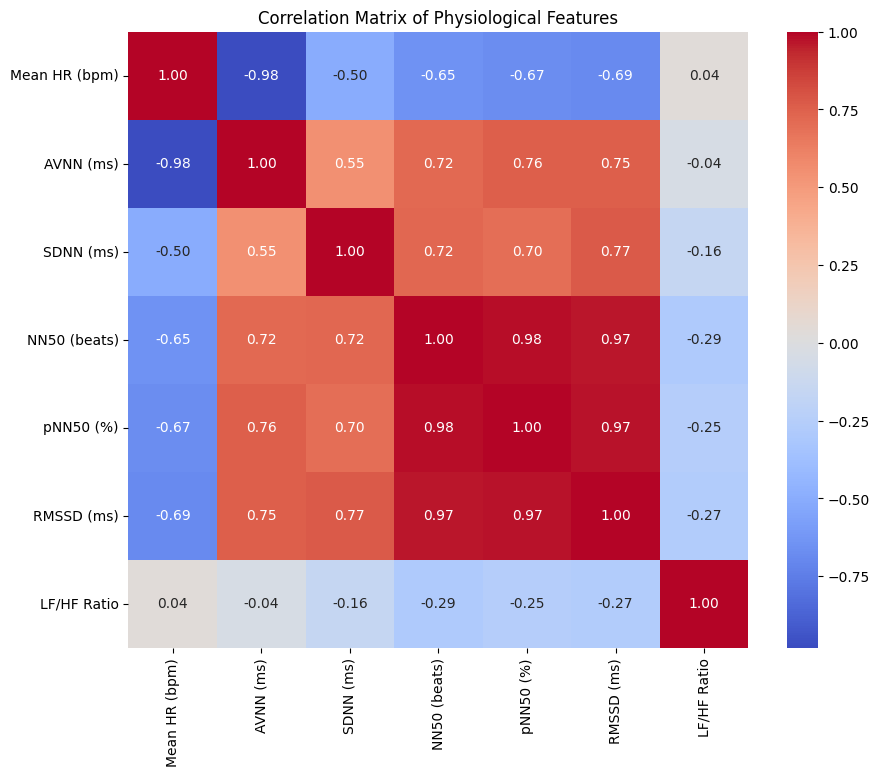

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(combined_df[physiological_measures].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Physiological Features')
plt.show()

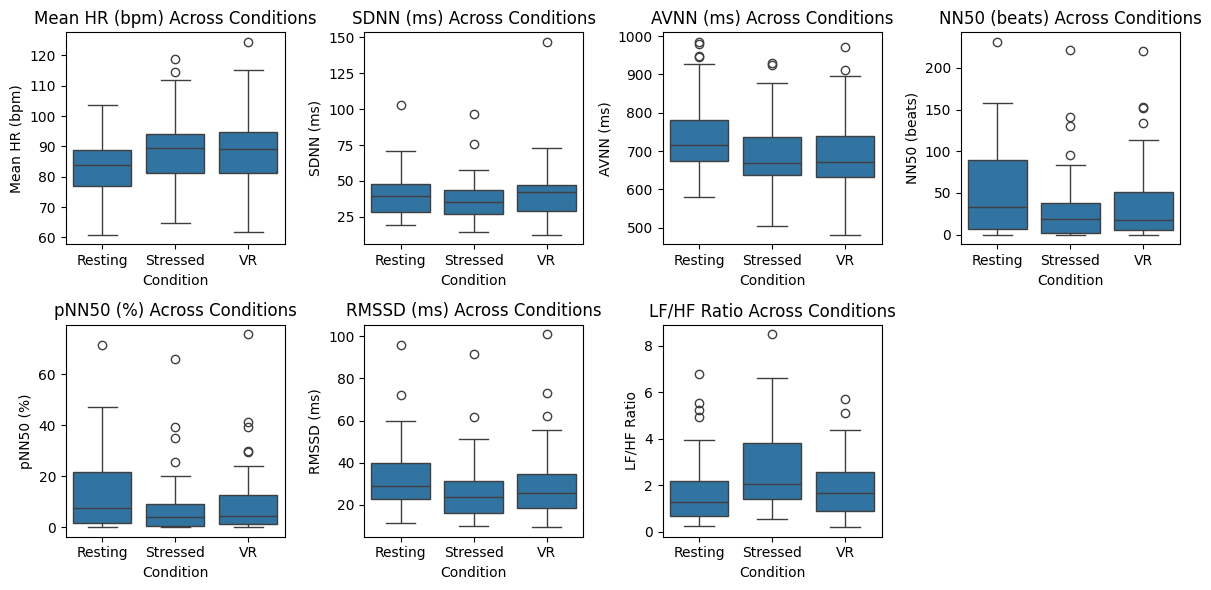

In [ ]:
hrv_metrics = ['Mean HR (bpm)','SDNN (ms)', 'AVNN (ms)', 'NN50 (beats)', 'pNN50 (%)', 'RMSSD (ms)', 'LF/HF Ratio']

# Create boxplots for each HRV metric
plt.figure(figsize=(12, 6))

for i, metric in enumerate(hrv_metrics):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x='Phase', y=metric, data=combined_df)
    plt.title(f'{metric} Across Conditions')
    plt.xlabel('Condition')
    plt.ylabel(metric)

plt.tight_layout()
plt.show()

In [ ]:
relevant_features = ['Mean HR (bpm)', 'SDNN (ms)', 'RMSSD (ms)', 'LF/HF Ratio']

Text(0, 0.5, 'LF/HF Ratio')

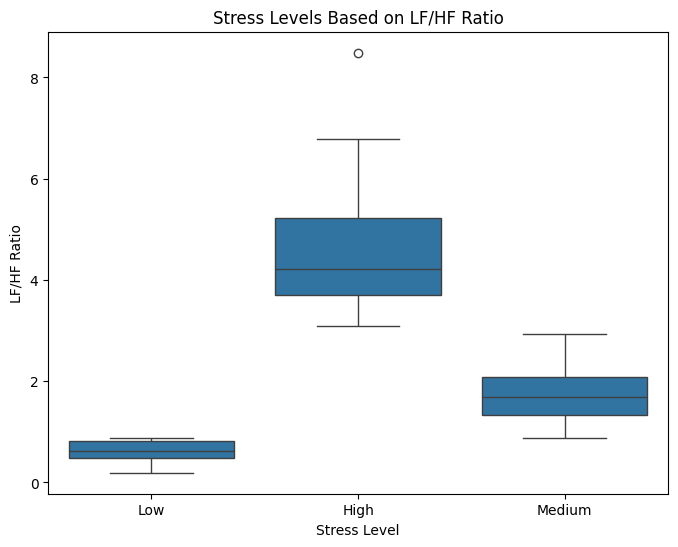

In [ ]:
low_threshold = combined_df['LF/HF Ratio'].quantile(0.25)
high_threshold = combined_df['LF/HF Ratio'].quantile(0.75)

combined_df['Stress_Level'] = 'Low'
combined_df.loc[combined_df['LF/HF Ratio'] > high_threshold, 'Stress_Level'] = 'High'
combined_df.loc[(combined_df['LF/HF Ratio'] <= high_threshold) & (combined_df['LF/HF Ratio'] > low_threshold), 'Stress_Level'] = 'Medium'

plt.figure(figsize=(8, 6))
sns.boxplot(x='Stress_Level', y='LF/HF Ratio', data=combined_df)
plt.title('Stress Levels Based on LF/HF Ratio')
plt.xlabel('Stress Level')
plt.ylabel('LF/HF Ratio')

In [ ]:
resting_df['RMSSD_SDNN_Ratio'] = resting_df['RMSSD (ms)'] / resting_df['SDNN (ms)']
stress_df['RMSSD_SDNN_Ratio'] = stress_df['RMSSD (ms)'] / stress_df['SDNN (ms)']
vr_df['RMSSD_SDNN_Ratio'] = vr_df['RMSSD (ms)'] / vr_df['SDNN (ms)']
combined_df = pd.concat([resting_df, stress_df, vr_df], ignore_index=True)

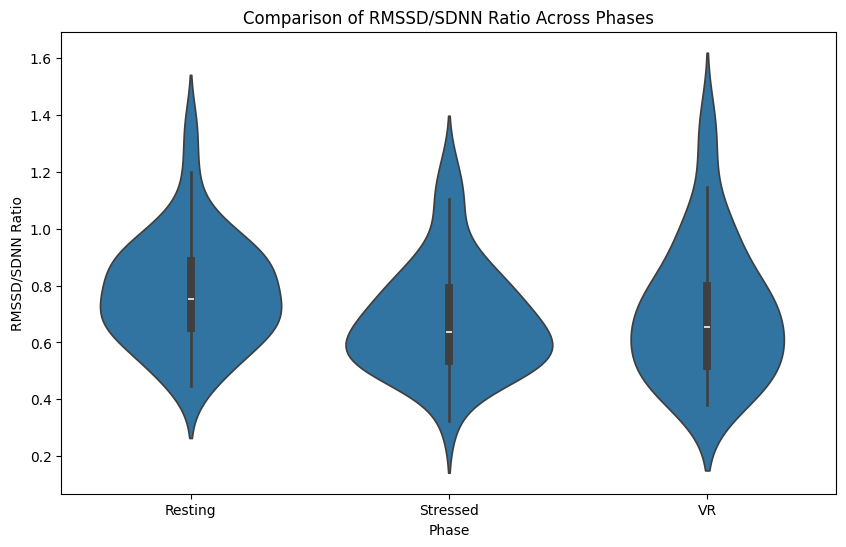

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Phase', y='RMSSD_SDNN_Ratio', data=combined_df)
plt.title('Comparison of RMSSD/SDNN Ratio Across Phases')
plt.xlabel('Phase')
plt.ylabel('RMSSD/SDNN Ratio')
plt.show()

**Machine Learning Model**

*Important Libraries for Model building*

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE

In [ ]:
# Define features and target
X = combined_df[['RMSSD (ms)', 'SDNN (ms)', 'RMSSD_SDNN_Ratio', 'LF/HF Ratio']]
y = combined_df['Phase']

# Data balancing using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Data scaling
scaler = StandardScaler()
X_res = scaler.fit_transform(X_res)

# Feature selection using RFE
rf = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=3, step=1)
rfe.fit(X_res, y_res)
X_selected = rfe.transform(X_res)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_res, test_size=0.2, random_state=42)

# Model selection and hyperparameter tuning using GridSearchCV
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

param_grids = {
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]},
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Gradient Boosting': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
}

best_models = {}

for name, model in models.items():
    param_grid = param_grids[name]
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_

# Evaluate best models
for name, model in best_models.items():
    cv_scores = cross_val_score(model, X_selected, y_res, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42))
    print(f"{name} - Cross-validation scores:", cv_scores)
    print(f"{name} - Mean cross-validation score:", cv_scores.mean())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} - Accuracy:", accuracy)
    print(f"{name} - Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"{name} - Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Random Forest - Cross-validation scores: [0.66666667 0.25       0.33333333 0.33333333 0.33333333 0.25
 0.25       0.33333333 0.5        0.33333333]
Random Forest - Mean cross-validation score: 0.35833333333333334
Random Forest - Accuracy: 0.5833333333333334
Random Forest - Classification Report:
              precision    recall  f1-score   support

     Resting       0.70      0.88      0.78         8
    Stressed       0.50      0.40      0.44        10
          VR       0.50      0.50      0.50         6

    accuracy                           0.58        24
   macro avg       0.57      0.59      0.57        24
weighted avg       0.57      0.58      0.57        24

Random Forest - Confusion Matrix:
[[7 1 0]
 [3 4 3]
 [0 3 3]]
Logistic Regression 

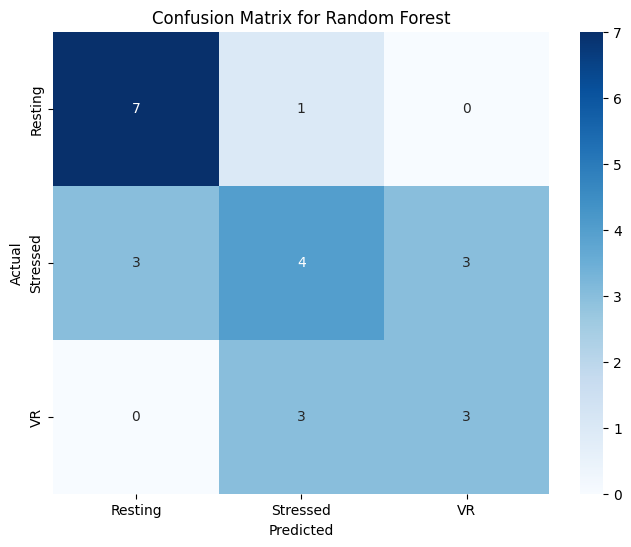

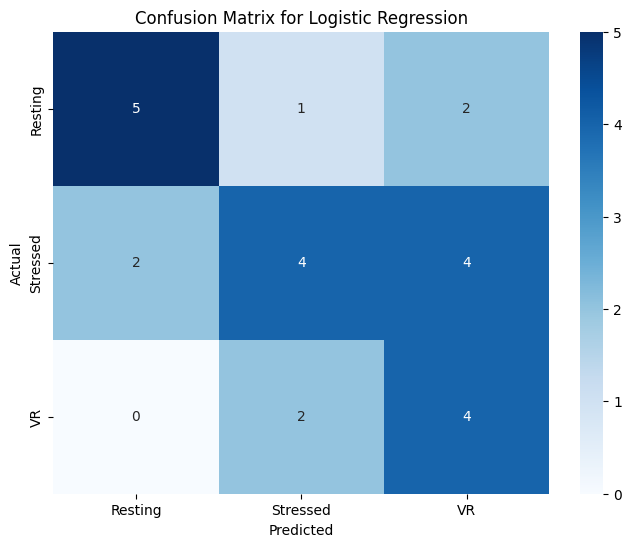

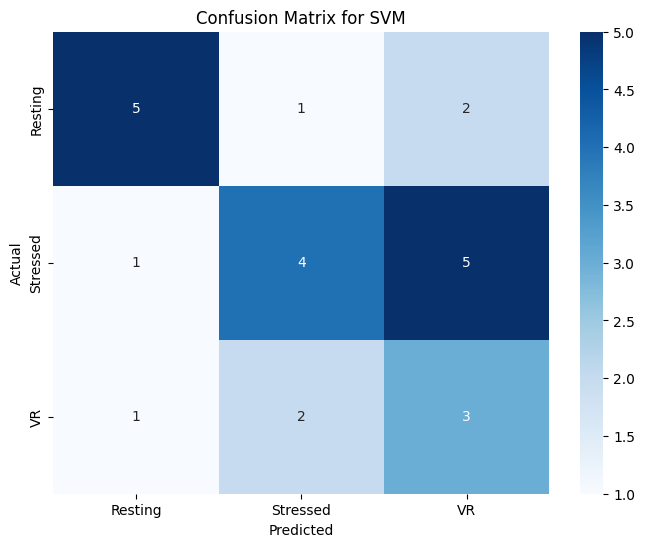

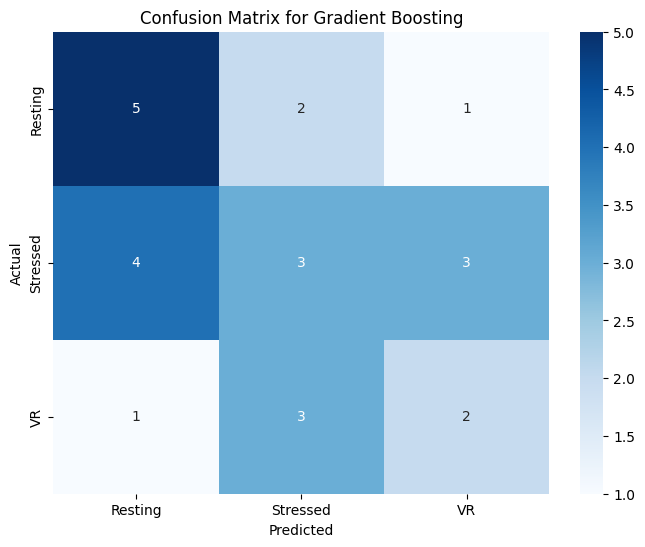

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot confusion matrix for each model
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


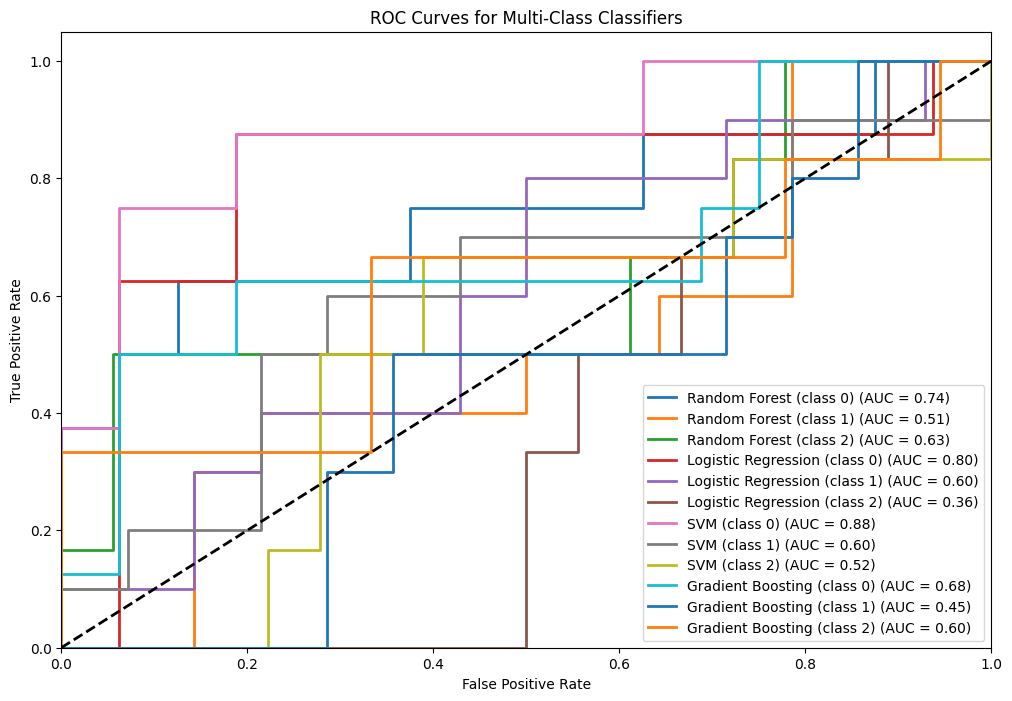

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Dictionary to store ROC curve data for each classifier
roc_data = {}

# Compute ROC curve and ROC area for each class
for name, model in best_models.items():
    classifier = OneVsRestClassifier(model)

    if hasattr(classifier, "predict_proba"):
        y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
    else:
        y_score = classifier.fit(X_train, y_train).decision_function(X_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    roc_data[name] = (fpr, tpr, roc_auc)

# Plot all ROC curves
plt.figure(figsize=(12, 8))

for name, (fpr, tpr, roc_auc) in roc_data.items():
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'{name} (class {i}) (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-Class Classifiers')
plt.legend(loc="lower right")
plt.show()


**statistical analysis**

In [ ]:
combined_df2 = resting_df.merge(stress_df, on='Subject NO.', suffixes=('_Resting', '_Stress'))
combined_df2 = combined_df2.merge(vr_df, on='Subject NO.', suffixes=('_Stress', '_VR'))

In [ ]:
combined_df2.head()

,Subject NO.,Gender_Resting,Mean HR (bpm)_Resting,AVNN (ms)_Resting,SDNN (ms)_Resting,NN50 (beats)_Resting,pNN50 (%)_Resting,RMSSD (ms)_Resting,LF (ms2)_Resting,LF Norm (n.u.)_Resting,...,NN50 (beats),pNN50 (%),RMSSD (ms),LF (ms2),LF Norm (n.u.),HF (ms2),HF Norm (n.u.),LF/HF Ratio,Phase,RMSSD_SDNN_Ratio
0,1,Female,85.8474,698.9147,45.8957,46,10.7477,29.6913,412.1663,46.8523,...,45,8.6705,30.0076,813.6953,58.1812,583.9248,41.7521,1.3935,VR,0.659754
1,2,Female,88.3727,678.9429,23.8804,0,0.0000,11.6837,314.3801,87.1339,...,1,0.2062,12.5337,425.9147,83.6495,83.2058,16.3416,5.1188,VR,0.411325
2,3,Female,79.4924,754.7887,50.0888,71,17.4877,37.8050,612.5444,45.8684,...,46,10.2450,31.5905,686.2512,59.8579,459.9247,40.1167,1.4921,VR,0.755835
3,4,Female,78.8327,761.1057,41.4575,27,6.4593,27.0164,446.1722,64.1144,...,12,2.7460,22.3689,920.9665,78.6767,249.4575,21.3108,3.6919,VR,0.634348
4,5,Female,63.3055,947.7851,40.0863,54,16.0714,35.2921,367.0269,49.2067,...,19,5.1630,29.3408,384.1729,85.0167,67.1927,14.8696,5.7175,VR,0.764384


In [ ]:
combined_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Subject NO.               40 non-null     int64  
 1   Gender_Resting            40 non-null     object 
 2   Mean HR (bpm)_Resting     40 non-null     float64
 3   AVNN (ms)_Resting         40 non-null     float64
 4   SDNN (ms)_Resting         40 non-null     float64
 5   NN50 (beats)_Resting      40 non-null     int64  
 6   pNN50 (%)_Resting         40 non-null     float64
 7   RMSSD (ms)_Resting        40 non-null     float64
 8   LF (ms2)_Resting          40 non-null     float64
 9   LF Norm (n.u.)_Resting    40 non-null     float64
 10  HF (ms2)_Resting          40 non-null     float64
 11  HF Norm (n.u.)_Resting    40 non-null     float64
 12  LF/HF Ratio_Resting       40 non-null     float64
 13  Phase_Resting             40 non-null     object 
 14  RMSSD_SDNN_R

In [ ]:
from scipy import stats

# Define HRV metric columns for each phase
hrv_columns_resting = ['AVNN (ms)_Resting', 'SDNN (ms)_Resting', 'NN50 (beats)_Resting', 'pNN50 (%)_Resting', 'RMSSD (ms)_Resting','LF/HF Ratio_Resting']
hrv_columns_stress = ['AVNN (ms)_Stress', 'SDNN (ms)_Stress', 'NN50 (beats)_Stress', 'pNN50 (%)_Stress', 'RMSSD (ms)_Stress','LF/HF Ratio_Stress']
hrv_columns_vr = ['AVNN (ms)', 'SDNN (ms)', 'NN50 (beats)', 'pNN50 (%)', 'RMSSD (ms)', 'LF/HF Ratio']

# Perform paired t-tests for each HRV metric
for hrv_metric in range(len(hrv_columns_resting)):
    # Extract data for the current HRV metric
    hrv_data_resting = combined_df2[hrv_columns_resting[hrv_metric]]
    hrv_data_stress = combined_df2[hrv_columns_stress[hrv_metric]]
    hrv_data_vr = combined_df2[hrv_columns_vr[hrv_metric]]

    # Perform paired t-tests between Resting and Stress phases
    t_stat_resting_stress, p_val_resting_stress = stats.ttest_rel(hrv_data_resting, hrv_data_stress)
    print(f'Paired t-test for {hrv_columns_resting[hrv_metric]} (Resting vs Stress): t-stat={t_stat_resting_stress}, p-value={p_val_resting_stress}')

    # Perform paired t-tests between Stress and VR phases
    t_stat_stress_vr, p_val_stress_vr = stats.ttest_rel(hrv_data_stress, hrv_data_vr)
    print(f'Paired t-test for {hrv_columns_resting[hrv_metric]} (Stress vs VR): t-stat={t_stat_stress_vr}, p-value={p_val_stress_vr}')


Paired t-test for AVNN (ms)_Resting (Resting vs Stress): t-stat=9.175388959945424, p-value=2.7618075577130328e-11
Paired t-test for AVNN (ms)_Resting (Stress vs VR): t-stat=-0.8010322845539583, p-value=0.4279662823229674
Paired t-test for SDNN (ms)_Resting (Resting vs Stress): t-stat=2.3745715036752464, p-value=0.02258526134133794
Paired t-test for SDNN (ms)_Resting (Stress vs VR): t-stat=-2.202922609356735, p-value=0.03357582207124353
Paired t-test for NN50 (beats)_Resting (Resting vs Stress): t-stat=4.36918211832436, p-value=8.944599981403427e-05
Paired t-test for NN50 (beats)_Resting (Stress vs VR): t-stat=-3.009230460794682, p-value=0.004572846402132416
Paired t-test for pNN50 (%)_Resting (Resting vs Stress): t-stat=5.120094071037974, p-value=8.567806191546665e-06
Paired t-test for pNN50 (%)_Resting (Stress vs VR): t-stat=-3.4687248220652713, p-value=0.0012903822614664573
Paired t-test for RMSSD (ms)_Resting (Resting vs Stress): t-stat=6.121757669877544, p-value=3.508415626439074e-

In [ ]:
def cohen_d(group1, group2):
    """Compute Cohen's d for paired samples."""
    diff = group1.mean() - group2.mean()
    pooled_std = np.sqrt((group1.std()**2 + group2.std()**2) / 2)
    return diff / pooled_std

# Perform effect size analysis for each HRV metric
for hrv_metric in range(len(hrv_columns_resting)):
    # Extract data for the current HRV metric
    hrv_data_resting = combined_df2[hrv_columns_resting[hrv_metric]]
    hrv_data_stress = combined_df2[hrv_columns_stress[hrv_metric]]
    hrv_data_vr = combined_df2[hrv_columns_vr[hrv_metric]]

    # Calculate Cohen's d for Resting vs Stress and Stress vs VR
    d_resting_stress = cohen_d(hrv_data_resting, hrv_data_stress)
    d_stress_vr = cohen_d(hrv_data_stress, hrv_data_vr)

    # Print effect size for each comparison
    print(f'Effect size (Cohen\'s d) for {hrv_columns_resting[hrv_metric]} (Resting vs Stress): {d_resting_stress}')
    print(f'Effect size (Cohen\'s d) for {hrv_columns_resting[hrv_metric]} (Stress vs VR): {d_stress_vr}')

Effect size (Cohen's d) for AVNN (ms)_Resting (Resting vs Stress): 0.5049588509304063
Effect size (Cohen's d) for AVNN (ms)_Resting (Stress vs VR): -0.026010610591075595
Effect size (Cohen's d) for SDNN (ms)_Resting (Resting vs Stress): 0.18689929569558128
Effect size (Cohen's d) for SDNN (ms)_Resting (Stress vs VR): -0.2263603731453733
Effect size (Cohen's d) for NN50 (beats)_Resting (Resting vs Stress): 0.37848751506114403
Effect size (Cohen's d) for NN50 (beats)_Resting (Stress vs VR): -0.18326536915470232
Effect size (Cohen's d) for pNN50 (%)_Resting (Resting vs Stress): 0.3346537617302868
Effect size (Cohen's d) for pNN50 (%)_Resting (Stress vs VR): -0.1553844540227046
Effect size (Cohen's d) for RMSSD (ms)_Resting (Resting vs Stress): 0.3764204218321073
Effect size (Cohen's d) for RMSSD (ms)_Resting (Stress vs VR): -0.1975030781203919
Effect size (Cohen's d) for LF/HF Ratio_Resting (Resting vs Stress): -0.5527467411474984
Effect size (Cohen's d) for LF/HF Ratio_Resting (Stress vs

In [ ]:
deliberate_stress_lf_hf = stress_df["LF/HF Ratio"]
vr_stress_lf_hf = vr_df["LF/HF Ratio"]

t_statistic, p_value = stats.ttest_ind(deliberate_stress_lf_hf, vr_stress_lf_hf)

# Output results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)
if p_value < 0.05:
    print("The difference in LF/HF Ratio between VR Immersion and Resting conditions is statistically significant.")
else:
    print("There is no statistically significant difference in LF/HF Ratio between VR Immersion and Resting conditions.")

T-Statistic: 1.9975673297468177
P-Value: 0.04925033479371342
The difference in LF/HF Ratio between VR Immersion and Resting conditions is statistically significant.


**The code suggest that there is a significant changes in different hrv parameter from stressed to vr stage suggesting the imapact of vr in reducing stress.
The most prominant feature giving maximum deviation is lf/hf ratio and other are giving modest deviation suggesting the scope of improvement for future studies**